<a href="https://colab.research.google.com/github/hudsonpanini/TC1002S/blob/main/Reto_A01739472_A01639305.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alessandra Caballero Pineda A01739472

Vianey Gamiño Barrón A01639305

#Carga del dataset

In [23]:
#importamos Numpy y Pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
#cargamos el dataset y lo asignamos como dataframe
df = pd.read_csv("/content/CC GENERAL.csv")
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

#Limpieza de los datos

In [25]:
#revisamos si hay valores nulos
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [26]:
#eliminamos los valores nulos
df = df.dropna()

In [27]:
#verificamos
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


#Hipótesis y selección de columnas

**Hipótesis:** Los clientes con alta frecuencia de adelantos en efectivo y bajo porcentaje de pago completo muestran un comportamiento más riesgoso para préstamos.

**Columnas:** CASH_ADVANCE_FREQUENCY y PRC_FULL_PAYMENT

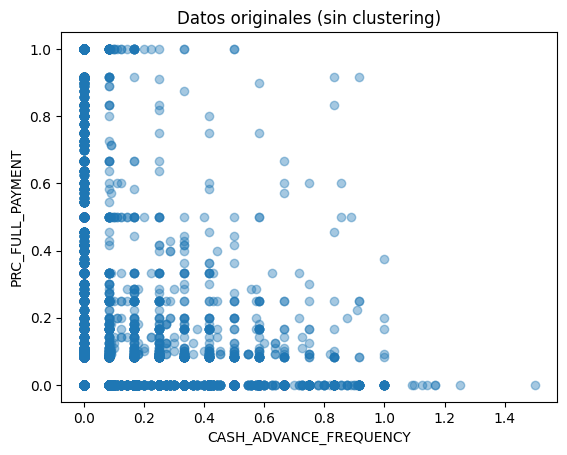

In [28]:
#6. Crea una scatter plot con las dos columnas relacionadas.
X = df[["CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT"]]
plt.scatter(X["CASH_ADVANCE_FREQUENCY"], X["PRC_FULL_PAYMENT"], alpha=0.4)
plt.xlabel("CASH_ADVANCE_FREQUENCY")
plt.ylabel("PRC_FULL_PAYMENT")
plt.title("Datos originales (sin clustering)")
plt.show()

#K-means

In [29]:
from sklearn.cluster import KMeans

modelo_kmeans = KMeans(n_clusters=2, random_state=42)
modelo_kmeans.fit(X)

#centroides y etiquetas
centroides = modelo_kmeans.cluster_centers_
labels = modelo_kmeans.labels_

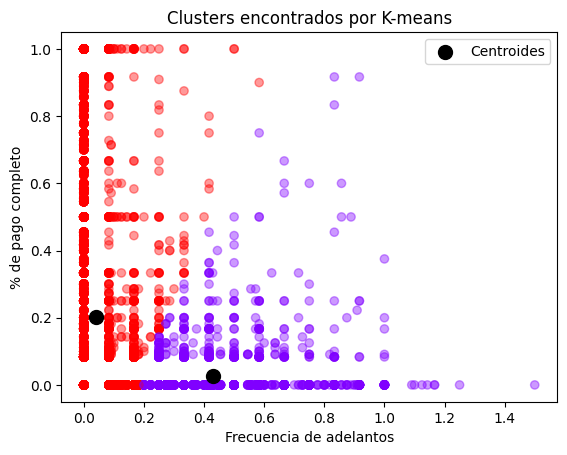

In [30]:
plt.scatter(X["CASH_ADVANCE_FREQUENCY"], X["PRC_FULL_PAYMENT"], c=labels, cmap='rainbow', alpha=0.4)
plt.scatter(centroides[:,0], centroides[:,1], c='black', marker='o', s=100, label='Centroides')
plt.xlabel("Frecuencia de adelantos")
plt.ylabel("% de pago completo")
plt.title("Clusters encontrados por K-means")
plt.legend()
plt.show()

In [31]:
print("Centroides encontrados:")
print(centroides)

Centroides encontrados:
[[0.4309164  0.02650893]
 [0.03989384 0.20354119]]


In [32]:
print("Etiquetas de los clusters (primeras 25):")
print(labels[:25])

Etiquetas de los clusters (primeras 25):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1]


#Interpretación



**Cluster 1 (no riesgosos para préstamos) - Rojo**
*   Porcentaje de pago completo alto. Baja frecuencia de adelantos.
*   Clientes 'responsables', con bajo riesgo crediticio.

**Cluster 2 (riesgosos para préstamos) - Morado**
*   Porcentaje de pago completo bajo. Alta frecuencia de adelantos.
*   Clientes de mayor riesgo, que podrían retrasarse en pagos o acumular deuda.

A los clientes del cluster positivo se les pueden ofrecer más crédito, beneficios adicionales o hipotecas, mientras que a los del cluster negativo se les deben aplicar controles de riesgo como límites de crédito más bajos, mayor monitoreo y requisitos más estrictos para préstamos. En realidad no hay una diferencia marcada, sino cierto rango que se cumple dentro del dataframe.


